# Eyes photos classification

## Introduction

### Dataset Overview:

- 4000 photos: 2000 of closed eyes and 2000 of open eyes
- different conditions, lighting and angle
- different sizes of photos


### Our goals:
- comparing different models for binary classification
- ensuring explainability when possible
- optionally unsupervised machine learning techniques for clustering the data, as many of them appear to be similar;
- then we could equalize the labels withing a cluster (semi-supervised machine learning) and use the obtained dataset as the training set; compare the results with the original one


### Future development directions:
- combining with eye detection, preferably realtime
- drowsiness detection
- example use case: detecting tired drivers

## Discovering the data

### Examples

In [1]:
#importing packages
import matplotlib.pyplot as plt
import os
import cv2
import matplotlib.pyplot as plt
from skimage import io
import numpy as np
from skimage.transform import resize

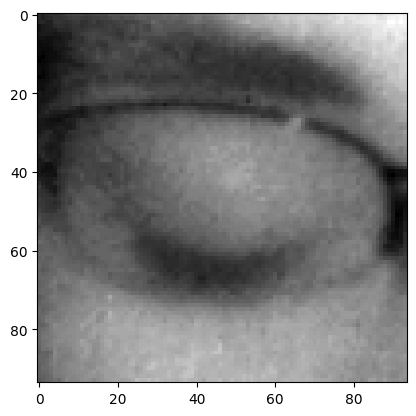

In [2]:
#loading example image from Closed Eyes dataset
img_path = "./data/train/Closed_Eyes/s0001_01476_0_1_0_0_0_01.png"

img_array = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
plt.imshow(img_array, cmap="gray")
plt.show()

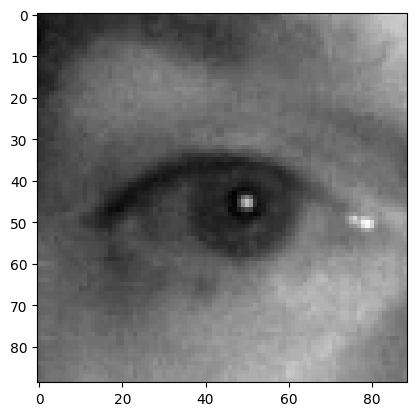

In [3]:
#loading example image from Open Eyes dataset
img_array2 = cv2.imread("./data/train/Open_Eyes/s0018_04012_0_0_1_0_1_01.png", cv2.IMREAD_GRAYSCALE)

plt.imshow(img_array2, cmap="gray")
plt.show()

### Potential problem - different photo sizes

In [4]:
# paths to data
path_closed = "./data/train/Closed_Eyes"
path_open = "./data/train/Open_Eyes"

# list of filenames
closed_eyes_files = os.listdir(path_closed)
open_eyes_files = os.listdir(path_open)


In [5]:
# images stored here
closed_eyes = []
open_eyes = []

# images loaded here
for file_name in closed_eyes_files:
    path = path_closed + "/" + file_name
    closed_eyes.append(io.imread(path))

for file_name in open_eyes_files:
    path = path_open + "/" + file_name
    open_eyes.append(io.imread(path))

# get sizes of the pictures in the array
closed_eyes_sizes = [image.shape[0] for image in closed_eyes]
open_eyes_sizes = [image.shape[0] for image in open_eyes]

In [6]:
import matplotlib.pyplot as plt

# plot sizes (pixels) of each photo
# all files are nxn
def plot_size(ax, arr, style, _label):
    ax.plot(arr, style, label = _label)
    ax.set_ylabel("size (n x n)")
    ax.set_xlabel("index")
    ax.legend()

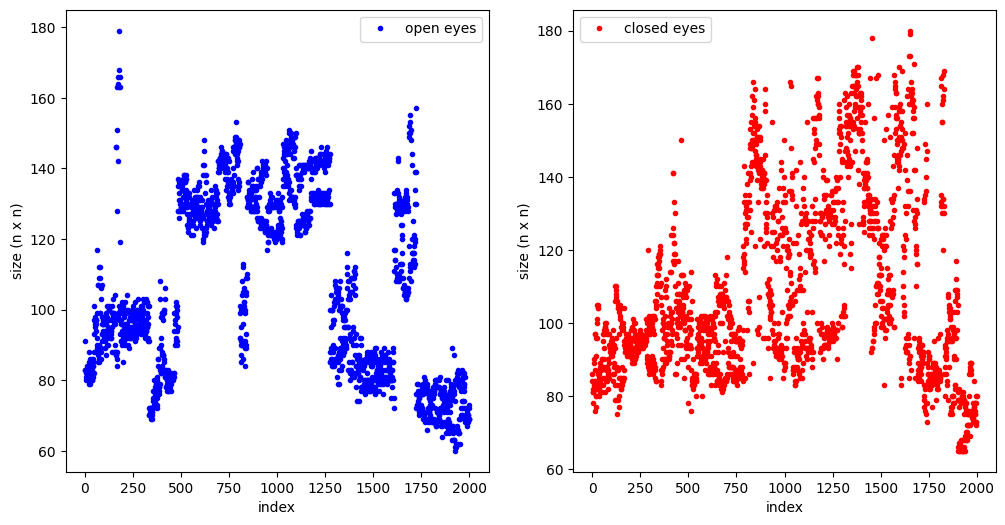

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

plot_size(axes[0], open_eyes_sizes, 'b.', "open eyes")
plot_size(axes[1], closed_eyes_sizes, 'r.', "closed eyes")

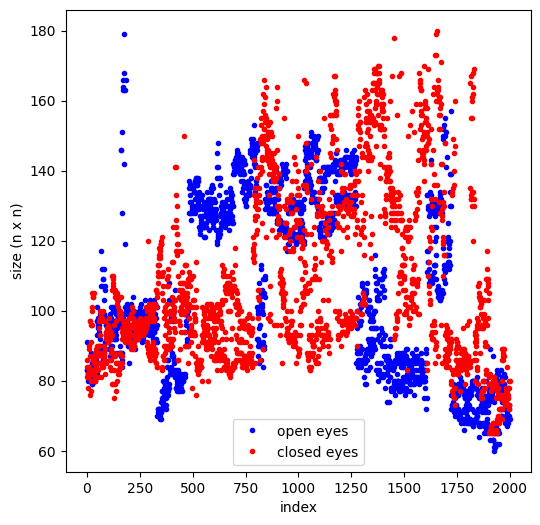

In [8]:
fig, axes = plt.subplots(1, 1, figsize=(6, 6))

plot_size(axes, open_eyes_sizes, 'b.', "open eyes")
plot_size(axes, closed_eyes_sizes, 'r.', "closed eyes")
plt.show()
plt.close()

In [9]:
n = 2000 # number of possible sizes
m = 2 # number of rows

# number of pictures with given size
# first row -> size of a picture 
# second row -> number of occurences
num_closed = np.zeros((n, m), dtype=int)
num_closed[:, 0] = np.arange(n)

num_open = np.zeros((n, m), dtype=int)
num_open[:, 0] = np.arange(n)

# count how many pictures of given size is
for i in range(n):
    num_closed[closed_eyes_sizes[i]][1] += 1
    num_open[open_eyes_sizes[i]][1] += 1

# prepare for displaying
cl_x = []
cl_y = []
o_x = []
o_y = []
for i in range(n):
    if(num_closed[i][1] != 0):
        cl_x.append(i)
        cl_y.append(num_closed[i][1])
    if (num_open[i][1] != 0):
        o_x.append(i)
        o_y.append(num_open[i][1])

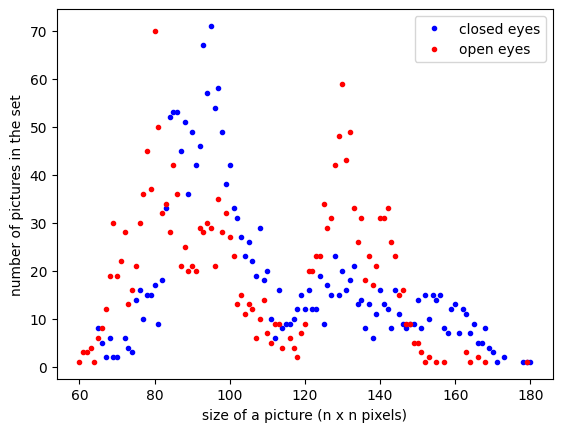

In [10]:
plt.plot(cl_x, cl_y, 'b.', label ="closed eyes")
plt.plot(o_x, o_y, 'r.', label="open eyes")
plt.xlabel("size of a picture (n x n pixels)")
plt.ylabel("number of pictures in the set")
plt.legend()
plt.show()
plt.close()

### Observation - potential data augmentation

Data augmentation is the process of artificially generating new data from existing data. For example, augmenting a dataset with many images includes adding noise to them, scaling, or cropping them. Analyzed dataset contains many images that seem to be very similar, which suggests that they might have been generated artificially.

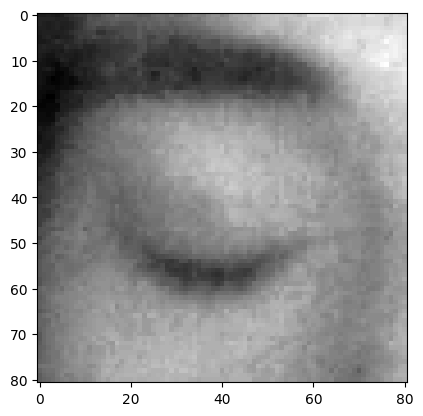

In [11]:
img_array = cv2.imread('./data/train/Closed_Eyes/s0001_00003_0_0_0_0_0_01.png', cv2.IMREAD_GRAYSCALE)
plt.imshow(img_array, cmap="gray")
plt.show()

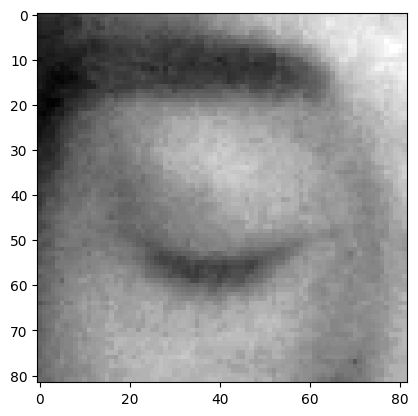

In [12]:
img_array2 = cv2.imread('./data/train/Closed_Eyes/s0001_00007_0_0_0_0_0_01.png', cv2.IMREAD_GRAYSCALE)
plt.imshow(img_array2, cmap="gray")
plt.show()

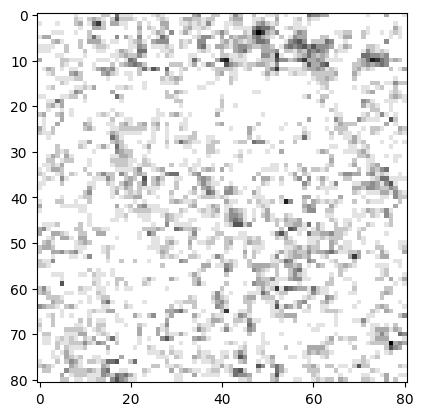

In [13]:
res = cv2.subtract(img_array, img_array2[0:81,0:81])
plt.imshow(img_array)
plt.imshow(255-res, cmap="gray")
plt.show()

## Preparing the data

### Resizing to the median

In [14]:
#finding the median of the size

sum_x = cl_x + o_x
sum_y = cl_y + o_y

median_size = (np.median(open_eyes_sizes + closed_eyes_sizes))
print(median_size) #median size = 100 
above = 0
below = 0

for i in range(len(sum_x)):
    if(sum_x[i] > median_size):
        above += sum_y[i]
    else:
        below += sum_y[i]

print(above, below)

100.0
1940 2060


In [15]:
# resize to target size, equal to mean value for all sizes (100)
target_size = (int(median_size), int(median_size))
open_resized = []
closed_resized = []

for img in closed_eyes:
    closed_resized.append(resize(img, target_size, anti_aliasing=True))

for img in open_eyes:
    open_resized.append(resize(img, target_size, anti_aliasing=True))

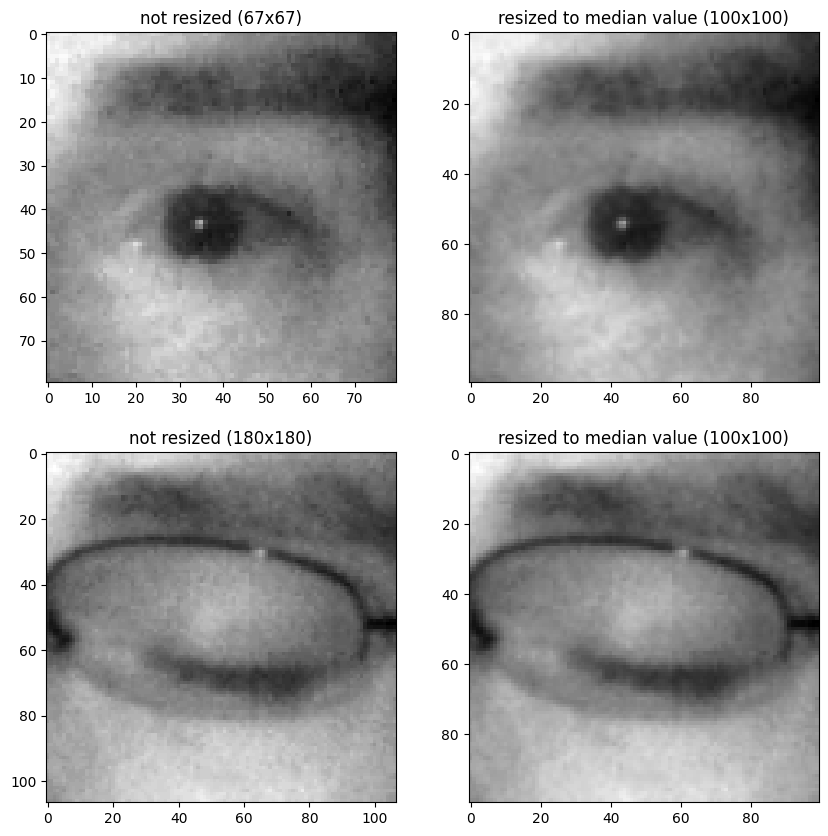

In [16]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10))

ax[0, 0].imshow(open_eyes[19], cmap='gray')
ax[0, 0].set_title('not resized (67x67)')

ax[0, 1].imshow(open_resized[19], cmap='gray')
ax[0, 1].set_title('resized to median value (100x100)')

ax[1, 0].imshow(closed_eyes[381], cmap='gray')
ax[1, 0].set_title('not resized (180x180)')

ax[1, 1].imshow(closed_resized[381], cmap='gray')
ax[1, 1].set_title('resized to median value (100x100)')

plt.show()

### Creating a feature matrix and a target variable vector

In [17]:
X = np.concatenate((closed_resized, open_resized), axis=0)
y = np.concatenate((np.zeros(2000), np.ones(2000))) # 0 for closed, 1 for open eye

### Splitting into train and test set

In [18]:
from sklearn.model_selection import StratifiedShuffleSplit, StratifiedKFold, RandomizedSearchCV, GridSearchCV

# stratified sampling
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(X, y):
    X_train, y_train = X[train_index], y[train_index]
    X_test, y_test = X[test_index], y[test_index]

# 4:1
# 3200 in train set, 1600 open 1600 closed
print(X_train.shape)

(3200, 100, 100)


### SVD

In [21]:
X_train_flattened = X_train.reshape(3200, -1)
X_train_no_PCA = X_train_flattened

In [22]:
X_centered = X_train_flattened - X_train_flattened.mean(axis = 0)
U, s, Vt = np.linalg.svd(X_centered)

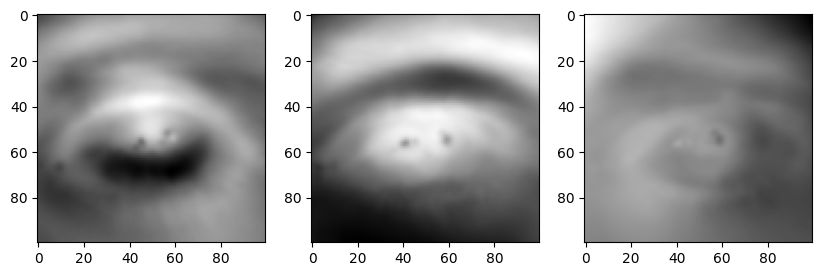

In [23]:
pc1 = Vt.T[:,0]
pc2 = Vt.T[:,1]
pc3 = Vt.T[:,2]

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10, 10))
ax1.imshow(pc1.reshape(100,100), cmap="gray")
ax2.imshow(pc2.reshape(100,100), cmap="gray")
ax3.imshow(pc3.reshape(100,100), cmap="gray")
plt.show()

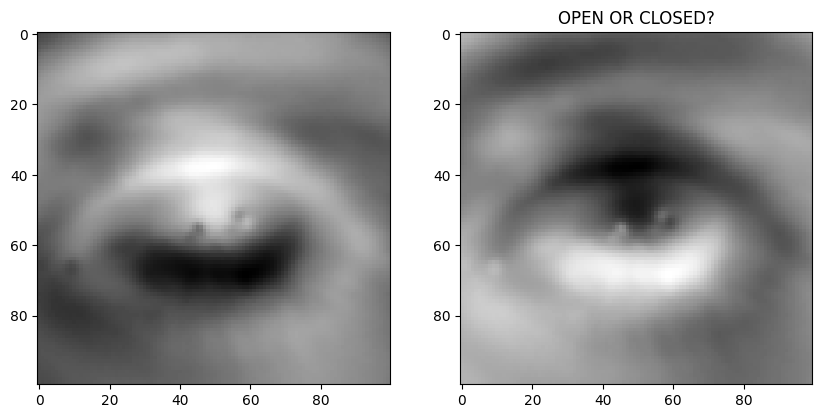

In [24]:

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 10))
plt.title("OPEN OR CLOSED?")
ax1.imshow(pc1.reshape(100,100), cmap="gray")
ax2.imshow(-pc1.reshape(100,100), cmap="gray")
plt.show()

### PCA

In [25]:
from sklearn.decomposition import PCA

pca = PCA(n_components=40)
X2D = pca.fit_transform(X_train_flattened)

In [26]:
# how much variance does it explain?
print(pca.explained_variance_ratio_)
explained_variance = sum(pca.explained_variance_ratio_)
print("lost", (1.0 - explained_variance))

[5.77379153e-01 1.31635380e-01 1.00485937e-01 2.96739553e-02
 2.51569737e-02 2.11494430e-02 1.18340154e-02 1.05258604e-02
 9.47635316e-03 6.31691656e-03 5.53054657e-03 4.92968890e-03
 4.62152312e-03 4.17026671e-03 3.32088286e-03 3.20345615e-03
 2.61998181e-03 2.42126902e-03 2.11952290e-03 1.96234537e-03
 1.71741386e-03 1.57399163e-03 1.49634912e-03 1.36039724e-03
 1.25744407e-03 1.21756026e-03 1.13713696e-03 1.08044056e-03
 1.00275224e-03 9.45798353e-04 8.45589518e-04 8.30955571e-04
 7.73780494e-04 7.23228755e-04 6.78269404e-04 6.69614999e-04
 6.50481367e-04 6.06809406e-04 5.77562826e-04 5.26013750e-04]
lost 0.02179493867937643


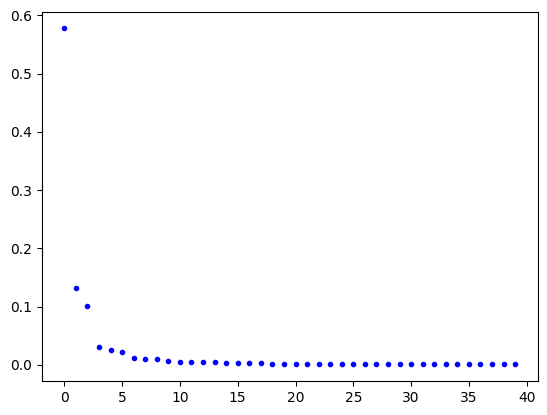

In [27]:
#plot variance explained by each of them
plt.plot(pca.explained_variance_ratio_, '.b')
plt.show()

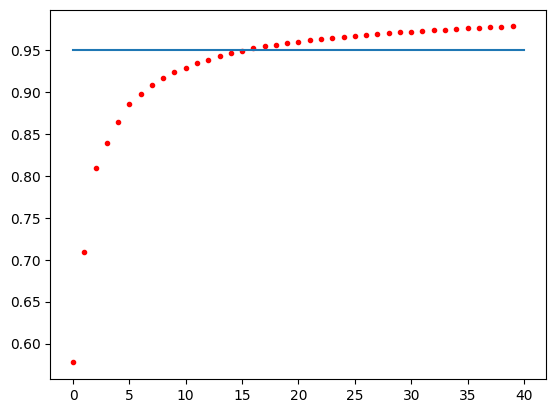

In [28]:
#plot variance explained by all of them to this point
plt.plot(np.cumsum(pca.explained_variance_ratio_),'.r')
a = np.linspace(0, 40, 100)  # Zakres wartości x od 0 do 10
b = np.full_like(a, 0.95) 
plt.plot(a, b)
plt.show()

Decision: choosing the number of components that explains 95% of variance

In [29]:
pca = PCA(n_components=0.95, random_state=42)
X_train_flattened = pca.fit_transform(X_train_flattened)
X_test_flattened = X_test.reshape(800, -1)
X_test_flattened = pca.transform(X_test_flattened) #not fit transform

### How well does the PCA clusterize our data?

In [30]:
print(X_train_no_PCA.shape)

(3200, 10000)


In [31]:
#added now
pca = PCA(n_components=2)
X_train_2D = pca.fit_transform(X_train_no_PCA)

pca = PCA(n_components=3)
X_train_3D = pca.fit_transform(X_train_no_PCA)

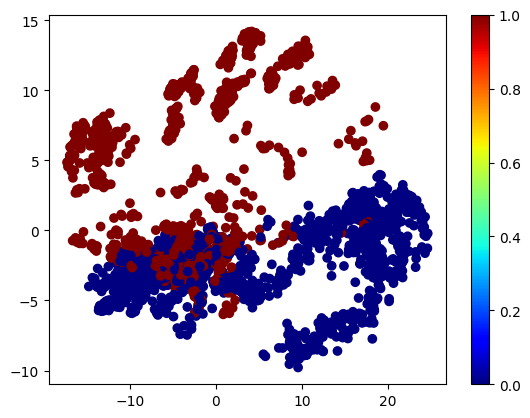

In [32]:
fig = plt.figure()
plt.scatter(X_train_2D[:, 0], X_train_2D[:, 1], c=y_train, cmap = "jet")
plt.colorbar()
plt.show()
#ax = fig.add_subplot(111, projection = "3d")

#ax.plot(X_train_2D[:, 0], X_train_2D[:, 1], X_train_2D[:, 2], "k.")

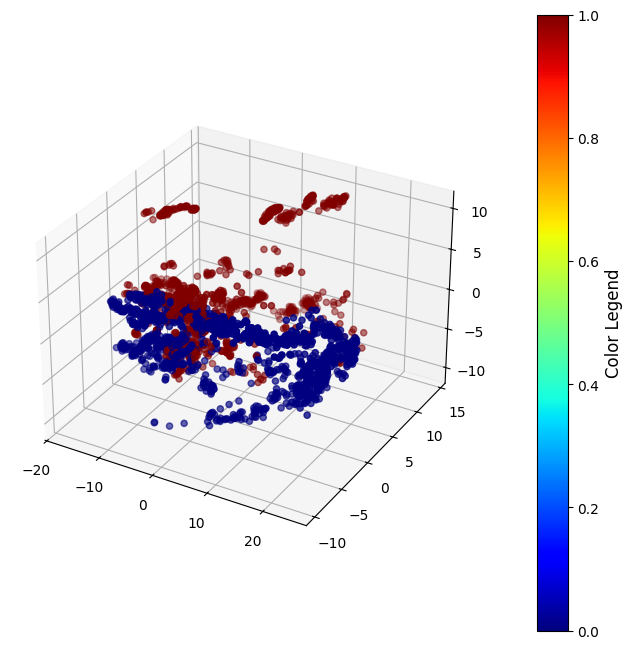

In [33]:
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection = "3d")
ax.scatter(X_train_3D[:, 0], X_train_3D[:, 1], X_train_3D[:,2], c=y_train, cmap = "jet")
cbar = fig.colorbar(ScalarMappable(norm=Normalize(vmin=y_train.min(), vmax=y_train.max()), cmap="jet"), 
                    ax=ax, pad=0.1)
cbar.set_label('Color Legend', fontsize=12)
plt.show()

Not so well...

### What about TSNE?

In [34]:
from sklearn.manifold import TSNE
X_train_2D_TSNE = TSNE(n_components=2).fit_transform(X_train_no_PCA)


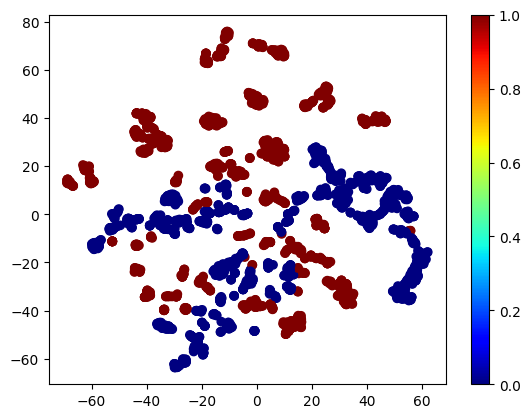

In [35]:
fig = plt.figure()
plt.scatter(X_train_2D_TSNE[:, 0], X_train_2D_TSNE[:, 1], c=y_train, cmap = "jet")
plt.colorbar()
plt.show()

In [36]:
X_train_3D_TSNE = TSNE(n_components=3).fit_transform(X_train_no_PCA)


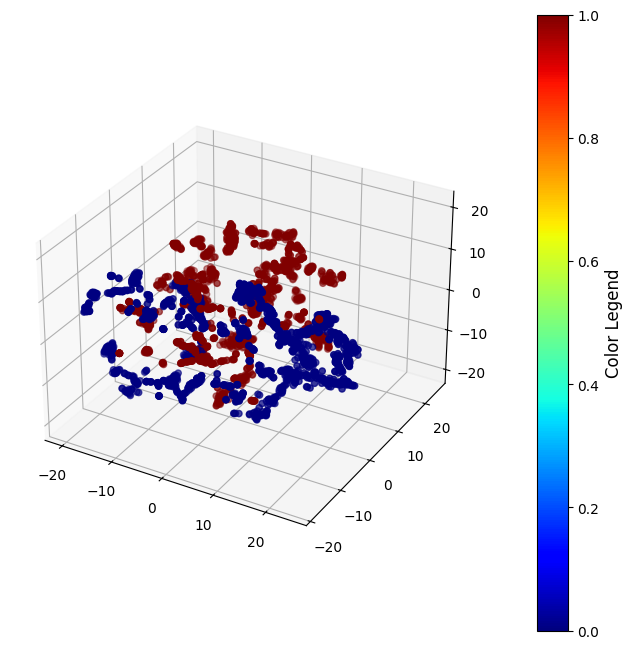

In [37]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection = "3d")
ax.scatter(X_train_3D_TSNE[:, 0], X_train_3D_TSNE[:, 1], X_train_3D_TSNE[:,2], c=y_train, cmap = "jet")
cbar = fig.colorbar(ScalarMappable(norm=Normalize(vmin=y_train.min(), vmax=y_train.max()), cmap="jet"), 
                    ax=ax, pad=0.1)
cbar.set_label('Color Legend', fontsize=12)
plt.show()

### Maybe PCA+TSNE?

In [38]:
from sklearn.pipeline import Pipeline
pca_tsne = Pipeline([
    ("pca", PCA(n_components=5, random_state=42)),
    ("tsne", TSNE(n_components=2, random_state=42)),
])
X_pca_tsne_2D = pca_tsne.fit_transform(X_train_no_PCA)



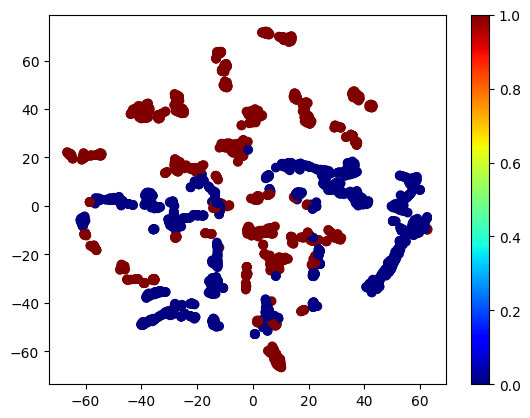

In [39]:
fig = plt.figure()
plt.scatter(X_pca_tsne_2D[:, 0], X_pca_tsne_2D[:, 1], c=y_train, cmap = "jet")
plt.colorbar()
plt.show()

### How useful is PCA for copression in our case?

In [ ]:
pca_for_compression = PCA(n_components = 0.95)  #17 components
X_train_17D = pca_for_compression.fit_transform(X_train_no_PCA)



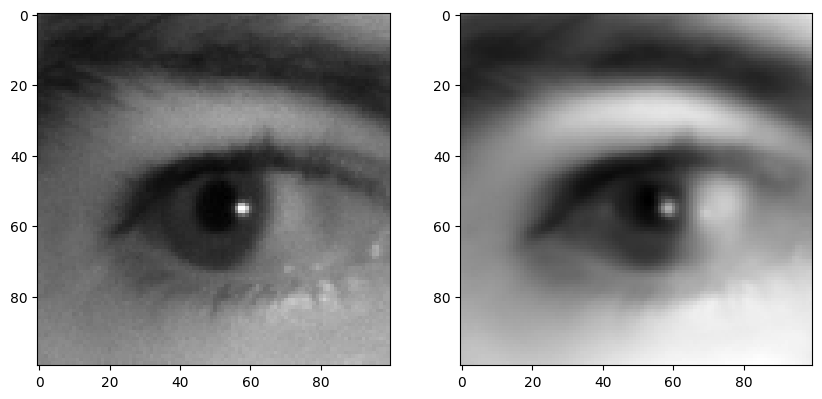

In [168]:
X_recovered = pca.inverse_transform(X_train_17D[10])
X_recovered = X_recovered.reshape(X_train[10].shape)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 10))
ax2.imshow(X_recovered, cmap="gray")
ax1.imshow(X_train[10], cmap="gray")
plt.show()


### Standarization

In [31]:
from sklearn.preprocessing import StandardScaler

# mean = 0
# standard deviation = 1

scaler = StandardScaler()
X_train_flattened = scaler.fit_transform(X_train_flattened)
X_test_flattened = scaler.transform(X_test_flattened) # NOT FIT TRANSFORM
print(np.std(X_train_flattened))
print(abs(round(np.mean(X_train_flattened), 17)))

0.9999999999999999
1e-17


## Training models

In [191]:
#function for evaluating models
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
def evaluate_results(y, y_pred):
    c_matrix = confusion_matrix(y, y_pred)
    print(c_matrix)
    
    precision = precision_score(y, y_pred)
    print("Precision: " , precision)
    recall = recall_score(y, y_pred)
    print("Recall: " , recall)
    f1 = f1_score(y, y_pred)
    print("F1: " , f1)
    #todo maybe: precision vs recall curve
    #todo maybe: ROC curve
    

### Curiosity related to explainale AI
Before training models on the dataset with reduced dimensionality, we decided to go back to the initial dataset and check the importance of each pixel according to the random forest.

In [19]:
from sklearn.ensemble import RandomForestClassifier
rnd_clf_for_cross_val = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=1, random_state=42)

from sklearn.model_selection import cross_val_score
scores = cross_val_score(rnd_clf_for_cross_val, X_train.reshape(3200, -1), y_train, cv=5)
print(scores)
print(scores.mean())
print(scores.std())



[0.9921875 0.9859375 0.9921875 0.984375  0.9859375]
0.9881249999999999
0.0033657280044590595


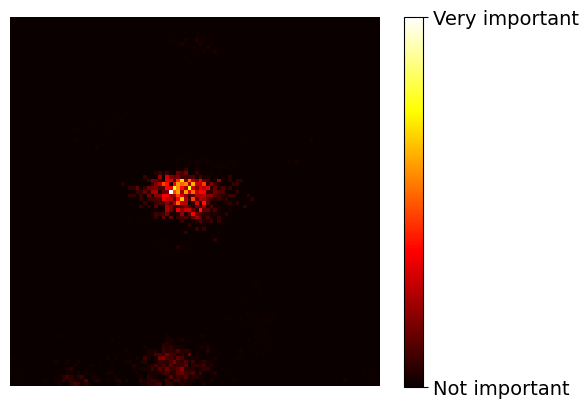

In [34]:
rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=1, random_state=42)
rnd_clf.fit(X_train.reshape(3200, -1), y_train)

heatmap_image = rnd_clf.feature_importances_.reshape(100, 100)
plt.imshow(heatmap_image, cmap="hot")
cbar = plt.colorbar(ticks=[rnd_clf.feature_importances_.min(),
                           rnd_clf.feature_importances_.max()])
cbar.ax.set_yticklabels(['Not important', 'Very important'], fontsize=14)
plt.axis("off")
plt.show()

### Random Forest

In [35]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=1, random_state=42)
scores = cross_val_score(rnd_clf_for_cross_val, X_train_flattened, y_train, cv=5)
print(scores)
print(scores.mean())
print(scores.std())

[0.98125   0.9859375 0.9890625 0.9875    0.9890625]
0.9865625
0.00289800577984241


### Random Forest hyperparameter tunning

In [36]:
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV
'''
param_distr = {"n_estimators": randint(low=200, high=700), 'max_leaf_nodes': randint(low=8, high=24)}
rnd_clf = RandomForestClassifier(random_state=42, n_jobs=1)

rnd_search = RandomizedSearchCV(rnd_clf, param_distr, n_iter=10, cv=5, random_state=42, scoring='f1')
rnd_search.fit(X_train_flattened, y_train)

cv_res = rnd_search.cv_results_

for mean_score, params in zip(cv_res['mean_test_score'], cv_res['params']):
    print(mean_score, params)
'''
#0.9874641017922207 {'max_leaf_nodes': 20, 'n_estimators': 220}

'\nparam_distr = {"n_estimators": randint(low=200, high=700), \'max_leaf_nodes\': randint(low=8, high=24)}\nrnd_clf = RandomForestClassifier(random_state=42, n_jobs=1)\n\nrnd_search = RandomizedSearchCV(rnd_clf, param_distr, n_iter=10, cv=5, random_state=42, scoring=\'f1\')\nrnd_search.fit(X_train_flattened, y_train)\n\ncv_res = rnd_search.cv_results_\n\nfor mean_score, params in zip(cv_res[\'mean_test_score\'], cv_res[\'params\']):\n    print(mean_score, params)\n'

In [37]:
'''
param_grid = [{"n_estimators": [210, 220, 230], "max_leaf_nodes": [18, 20, 22]}]
rnd_clf = RandomForestClassifier(random_state=42, n_jobs=1)

grid_search = GridSearchCV(rnd_clf, param_grid, cv=5, scoring='f1')
grid_search.fit(X_train_flattened, y_train)

cv_res = grid_search.cv_results_
for mean_score, params in zip(cv_res['mean_test_score'], cv_res['params']):
    print(mean_score, params)
'''

'\nparam_grid = [{"n_estimators": [210, 220, 230], "max_leaf_nodes": [18, 20, 22]}]\nrnd_clf = RandomForestClassifier(random_state=42, n_jobs=1)\n\ngrid_search = GridSearchCV(rnd_clf, param_grid, cv=5, scoring=\'f1\')\ngrid_search.fit(X_train_flattened, y_train)\n\ncv_res = grid_search.cv_results_\nfor mean_score, params in zip(cv_res[\'mean_test_score\'], cv_res[\'params\']):\n    print(mean_score, params)\n'

In [38]:
'''param_grid = [{"n_estimators": [230, 280, 350], "max_leaf_nodes": [24, 30, 36]}]
rnd_clf = RandomForestClassifier(random_state=42, n_jobs=1)

grid_search = GridSearchCV(rnd_clf, param_grid, cv=5, scoring='f1')
grid_search.fit(X_train_flattened, y_train)

cv_res = grid_search.cv_results_

for mean_score, params in zip(cv_res['mean_test_score'], cv_res['params']):
    print(mean_score, params)'''

'param_grid = [{"n_estimators": [230, 280, 350], "max_leaf_nodes": [24, 30, 36]}]\nrnd_clf = RandomForestClassifier(random_state=42, n_jobs=1)\n\ngrid_search = GridSearchCV(rnd_clf, param_grid, cv=5, scoring=\'f1\')\ngrid_search.fit(X_train_flattened, y_train)\n\ncv_res = grid_search.cv_results_\n\nfor mean_score, params in zip(cv_res[\'mean_test_score\'], cv_res[\'params\']):\n    print(mean_score, params)'

In [39]:
param_grid = [{"n_estimators": [600, 700, 800], "max_leaf_nodes": [50, 80, 100]}]
rnd_clf = RandomForestClassifier(random_state=42, n_jobs=1)

grid_search = GridSearchCV(rnd_clf, param_grid, cv=5, scoring='f1')
grid_search.fit(X_train_flattened, y_train)
cv_res = grid_search.cv_results_

for mean_score, params in zip(cv_res['mean_test_score'], cv_res['params']):
    print(mean_score, params)
# 0.9965648737517092 {'max_leaf_nodes': 80, 'n_estimators': 600} 

0.9962460815047022 {'max_leaf_nodes': 50, 'n_estimators': 600}
0.9959340582854894 {'max_leaf_nodes': 50, 'n_estimators': 700}
0.9959340582854894 {'max_leaf_nodes': 50, 'n_estimators': 800}
0.9971870017849709 {'max_leaf_nodes': 80, 'n_estimators': 600}
0.9971870017849709 {'max_leaf_nodes': 80, 'n_estimators': 700}
0.9971870017849709 {'max_leaf_nodes': 80, 'n_estimators': 800}
0.9971870017849709 {'max_leaf_nodes': 100, 'n_estimators': 600}
0.9971870017849709 {'max_leaf_nodes': 100, 'n_estimators': 700}
0.9971870017849709 {'max_leaf_nodes': 100, 'n_estimators': 800}


In [40]:
grid_search.best_estimator_.feature_importances_

array([0.13718525, 0.20807346, 0.04955328, 0.03583879, 0.20291479,
       0.05481383, 0.01677844, 0.02653876, 0.04158513, 0.02639343,
       0.01586591, 0.01709015, 0.09011767, 0.02562139, 0.02542105,
       0.01057674, 0.01563195])

### Evaluating Random Forest classifier on the test set

In [175]:
rnd_clf = RandomForestClassifier(random_state=42, n_jobs=1, max_leaf_nodes=80, n_estimators=600)
rnd_clf.fit(X_train_flattened, y_train)

proba = rnd_clf.predict_proba(X_test_flattened)
print(proba[:10])

score = rnd_clf.score(X_test_flattened, y_test)
print(score)

[[3.39964887e-03 9.96600351e-01]
 [3.41195887e-03 9.96588041e-01]
 [9.44997392e-01 5.50026082e-02]
 [5.16134830e-03 9.94838652e-01]
 [3.43509193e-03 9.96564908e-01]
 [3.17035109e-02 9.68296489e-01]
 [9.96583385e-01 3.41661488e-03]
 [1.70984839e-03 9.98290152e-01]
 [9.99927980e-01 7.20199113e-05]
 [7.86255411e-05 9.99921374e-01]]
0.99875


[[400   0]
 [  1 399]]
Precision:  1.0
Recall:  0.9975
F1:  0.9987484355444305


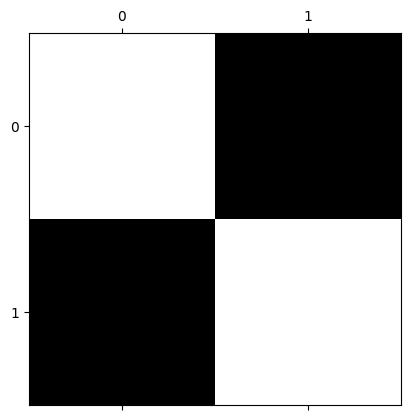

In [176]:
pred = rnd_clf.predict(X_test_flattened)
evaluate_results(y_test, pred)

[[[0.3258352  0.33315686 0.33664657 ... 0.61056912 0.61465127 0.60834078]
  [0.3255952  0.32775206 0.32994118 ... 0.60404069 0.60529539 0.61198882]
  [0.31927843 0.318      0.31685784 ... 0.59842892 0.61021127 0.61721275]
  ...
  [0.48688333 0.47990049 0.47440441 ... 0.60039706 0.60098333 0.60211716]
  [0.48592157 0.47737255 0.47399853 ... 0.61292451 0.61696078 0.61425069]
  [0.49358029 0.48961902 0.49115784 ... 0.63146961 0.62110078 0.61943931]]]
[444]


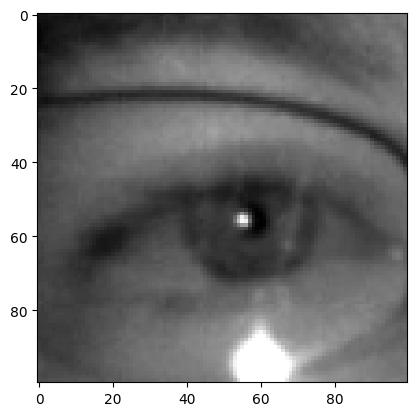

In [178]:
wrong = X_test[y_test != pred]
print(wrong)
plt.imshow(-wrong[0], cmap="gray")
print ([i for i in range(len(y_test)) if (y_test[i] != pred[i])])
plt.imshow(X_test[444], cmap="gray")

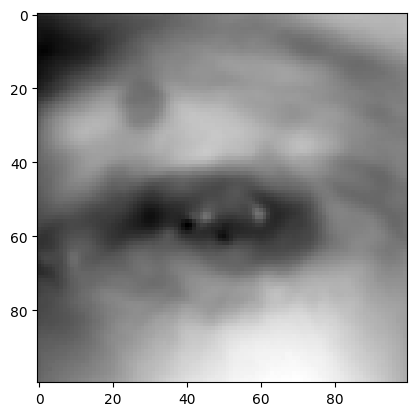

In [186]:
wrong_recovered = pca.inverse_transform(X_test_flattened[444])
plt.imshow(wrong_recovered.reshape(X_test[444].shape), cmap = "grey")

### SVM 

In [43]:
from sklearn.svm import SVC

svm_clf = SVC(random_state=42, C=5.0, degree=3, kernel="poly")
cross_val_score(svm_clf, X_train_flattened, y_train, cv=5, n_jobs=-1, scoring='f1')

array([0.990625  , 0.99212598, 0.99059561, 0.99843505, 0.99053628])

### SVM hyperparameter tuning

In [44]:
param_grid = [{"C": [1.0, 10.0, 15.0, 20.0, 30.0, 100.0], "degree": [1, 2, 3, 4, 5]}]
svm_clf = SVC(random_state=42, kernel="poly")

grid_search = GridSearchCV(svm_clf, param_grid, cv=5, n_jobs=-1, scoring='f1')
grid_search.fit(X_train_flattened, y_train)

cv_res = grid_search.cv_results_

for mean_score, params in zip(cv_res['mean_test_score'], cv_res['params']):
    print(mean_score, params)
    
# C = 10svm_clf = SVC(random_state=42, C=10.0, kernel="poly", degree=3)

0.9638136624229174 {'C': 1.0, 'degree': 1}
0.9828940471519839 {'C': 1.0, 'degree': 2}
0.9559908259871653 {'C': 1.0, 'degree': 3}
0.8650298871239814 {'C': 1.0, 'degree': 4}
0.8580446583441492 {'C': 1.0, 'degree': 5}
0.9639769585998119 {'C': 10.0, 'degree': 1}
0.993099418529909 {'C': 10.0, 'degree': 2}
0.994678157466986 {'C': 10.0, 'degree': 3}
0.9754530609675436 {'C': 10.0, 'degree': 4}
0.9293689031488659 {'C': 10.0, 'degree': 5}
0.9643118198851017 {'C': 15.0, 'degree': 1}
0.9937391673558663 {'C': 15.0, 'degree': 2}
0.9931043631274663 {'C': 15.0, 'degree': 3}
0.9807043898260199 {'C': 15.0, 'degree': 4}
0.9483206597125386 {'C': 15.0, 'degree': 5}
0.964943889486339 {'C': 20.0, 'degree': 1}
0.9946772024373358 {'C': 20.0, 'degree': 2}
0.9927922629190726 {'C': 20.0, 'degree': 3}
0.9832829359948407 {'C': 20.0, 'degree': 4}
0.9554868325406736 {'C': 20.0, 'degree': 5}
0.964617877846082 {'C': 30.0, 'degree': 1}
0.9940473042822486 {'C': 30.0, 'degree': 2}
0.9927883444237748 {'C': 30.0, 'degree': 

In [45]:
grid_search.best_estimator_.degree
grid_search.best_estimator_

SVC(C=10.0, kernel='poly', random_state=42)

### Evaluating SVM classifier on the test set

[[400   0]
 [  5 395]]
Precision:  1.0
Recall:  0.9875
F1:  0.9937106918238994


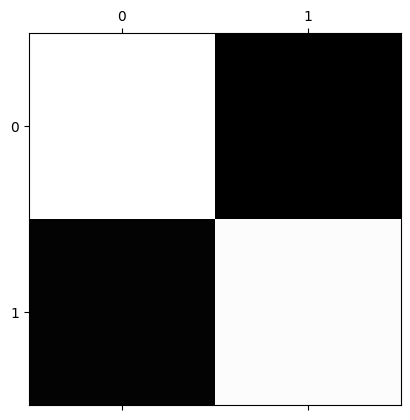

In [77]:
svm_clf = SVC(C=10.0, random_state=42, kernel="poly", degree=3)
svm_clf.fit(X_train_flattened, y_train)
svm_clf.score(X_test_flattened, y_test)
pred = svm_clf.predict(X_test_flattened)
evaluate_results(y_test, pred)

[213, 412, 444, 550, 706]


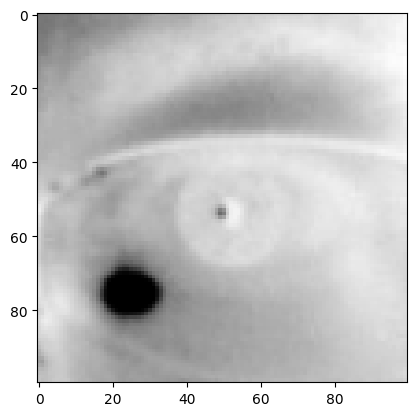

In [83]:
wrong = X_test[y_test != pred]
print([i for i in range(len(y_test)) if (y_test[i] != pred[i])])
plt.imshow(-X_test[706], cmap = "grey")

### Logistic Regression

In [47]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()

cross_val_score(log_reg, X_train_flattened, y_train, cv=5, n_jobs=-1, scoring='f1')

array([0.9470405 , 0.96366509, 0.96713615, 0.96661367, 0.953125  ])

### Logistic Regression Hyperparameter Tuning

In [51]:
param_grid = [{"C":[0.1, 0.5, 1.0, 10.0, 20.0, 50.0], "penalty": ["elasticnet"], "solver": ["saga"], "l1_ratio": [0.5]},
              {"C":[0.1, 0.5, 1.0, 10.0, 20.0, 50.0], "penalty": ["l1", "l2"], "solver": ["liblinear"]}]
log_reg_clf = LogisticRegression()


grid_search = GridSearchCV(log_reg_clf, param_grid, cv=5, n_jobs=-1, scoring='f1')
grid_search.fit(X_train_flattened, y_train)

cv_res = grid_search.cv_results_

for mean_score, params in zip(cv_res['mean_test_score'], cv_res['params']):
    print(mean_score, params)
    

0.9562039607915513 {'C': 0.1, 'l1_ratio': 0.5, 'penalty': 'elasticnet', 'solver': 'saga'}
0.9604345271243115 {'C': 0.5, 'l1_ratio': 0.5, 'penalty': 'elasticnet', 'solver': 'saga'}
0.9597894309070533 {'C': 1.0, 'l1_ratio': 0.5, 'penalty': 'elasticnet', 'solver': 'saga'}
0.9601162898836717 {'C': 10.0, 'l1_ratio': 0.5, 'penalty': 'elasticnet', 'solver': 'saga'}
0.9601162898836717 {'C': 20.0, 'l1_ratio': 0.5, 'penalty': 'elasticnet', 'solver': 'saga'}
0.9598091891740909 {'C': 50.0, 'l1_ratio': 0.5, 'penalty': 'elasticnet', 'solver': 'saga'}
0.9594668379823956 {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
0.9562539701952651 {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.9610384741360397 {'C': 0.5, 'penalty': 'l1', 'solver': 'liblinear'}
0.9585842201288621 {'C': 0.5, 'penalty': 'l2', 'solver': 'liblinear'}
0.9604393659609676 {'C': 1.0, 'penalty': 'l1', 'solver': 'liblinear'}
0.9592186947167184 {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.9604401040005893 {'C': 10.0, 'penal

In [52]:
grid_search.best_estimator_

LogisticRegression(C=0.5, penalty='l1', solver='liblinear')

### Evaluating Logistic Regression on test set

[[392   8]
 [ 13 387]]
Precision:  0.979746835443038
Recall:  0.9675
F1:  0.9735849056603774


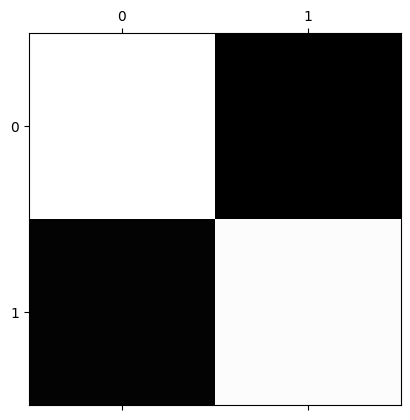

In [85]:
lr = LogisticRegression(C=0.5, penalty='l1', solver='liblinear')
lr.fit(X_train_flattened, y_train)
pred = lr.predict(X_test_flattened)
evaluate_results(y_test, pred)

[87, 151, 156, 180, 184, 243, 280, 305, 363, 412, 444, 489, 505, 530, 547, 580, 589, 666, 674, 724, 757]


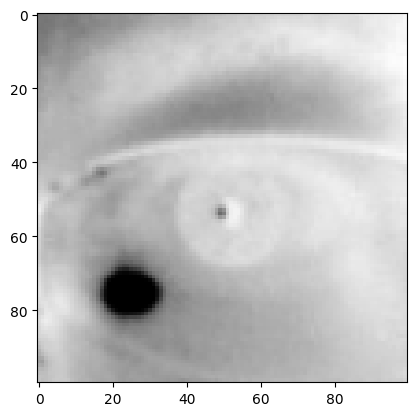

In [86]:
wrong = X_test[y_test != pred]
print([i for i in range(len(y_test)) if (y_test[i] != pred[i])])


### Decision tree

In [192]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(random_state=42)
cross_val_score(svm_clf, X_train_flattened, y_train, cv=5, n_jobs=-1, scoring='f1')


array([0.98578199, 0.98578199, 0.98904538, 0.98573693, 0.98273155])

### Decision Tree Hyperparameter tuning

In [194]:
param_grid = [{"max_depth": [10,50,100], "min_samples_split": [2,5,10,20]}]
tree_clf = DecisionTreeClassifier(random_state=42)

grid_search = GridSearchCV(tree_clf, param_grid, cv=5, n_jobs=-1, scoring='f1')
grid_search.fit(X_train_flattened, y_train)

cv_res = grid_search.cv_results_

for mean_score, params in zip(cv_res['mean_test_score'], cv_res['params']):
    print(mean_score, params)
print(grid_search.best_estimator_)    

0.9780100602533388 {'max_depth': 10, 'min_samples_split': 2}
0.9776969933766255 {'max_depth': 10, 'min_samples_split': 5}
0.9765268158106581 {'max_depth': 10, 'min_samples_split': 10}
0.9736910472336586 {'max_depth': 10, 'min_samples_split': 20}
0.9774809986820955 {'max_depth': 50, 'min_samples_split': 2}
0.97782533002222 {'max_depth': 50, 'min_samples_split': 5}
0.9796260678912798 {'max_depth': 50, 'min_samples_split': 10}
0.9752716946896646 {'max_depth': 50, 'min_samples_split': 20}
0.9774809986820955 {'max_depth': 100, 'min_samples_split': 2}
0.97782533002222 {'max_depth': 100, 'min_samples_split': 5}
0.9796260678912798 {'max_depth': 100, 'min_samples_split': 10}
0.9752716946896646 {'max_depth': 100, 'min_samples_split': 20}
DecisionTreeClassifier(max_depth=50, min_samples_split=10, random_state=42)


### Evaluating Decision Tree on test set

In [196]:
tree_clf = DecisionTreeClassifier(max_depth=50, min_samples_split=10, random_state=42)
tree_clf.fit(X_train_flattened, y_train)
pred = tree_clf.predict(X_test_flattened)
evaluate_results(y_test, pred)

[[394   6]
 [  3 397]]
Precision:  0.9851116625310173
Recall:  0.9925
F1:  0.9887920298879203


### Ensamble methods


In [199]:
from sklearn.ensemble import VotingClassifier

#Preparing the classifiers
tree_clf = DecisionTreeClassifier(max_depth=50, min_samples_split=10, random_state=42)
svm_clf = SVC(C=10.0, random_state=42, kernel="poly", degree=3)
lr_clf = LogisticRegression(C=0.5, penalty='l1', solver='liblinear')
voting_clf = VotingClassifier(
    estimators = [("rnf", tree_clf), ("svm", svm_clf), ("lr", lr_clf)],
    voting = "hard"         #hard voting since SVM do not predict probability
)
voting_clf.fit(X_train_flattened, y_train)
pred = voting_clf.predict(X_test_flattened)
evaluate_results(y_test, pred)


[[400   0]
 [  2 398]]
Precision:  1.0
Recall:  0.995
F1:  0.9974937343358395


In [88]:
wrong = X_test[y_test != pred]
print([i for i in range(len(y_test)) if (y_test[i] != pred[i])])

[412, 444]


### Unsupervised techniques for clustering

### K-Means

In [2]:
from sklearn.cluster import KMeans


In [1]:
k = 2
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X_train_flattened)

NameError: name 'KMeans' is not defined

In [211]:
print(y_pred.shape)
y_pred[0]

(3200,)


np.int32(1)

In [212]:
print(len([i for i in range(3200) if (y_pred[i] != y_train[i])]))

1037


array([[0.53839377, 0.54113776, 0.54381073, ..., 0.5565074 , 0.55173672,
        0.54653324],
       [0.36538795, 0.36479931, 0.36433811, ..., 0.34179529, 0.33987757,
        0.33810542]])